Bài tập trên lớp

In [ ]:
import numpy as np
signals = np.array([[1,2],[3,4],[10,0]])
sample = np.array([3,-1])
np.inner(signals, sample)

array([ 1,  5, 30])

In [ ]:
import numpy as np
A = np.array([0,0,-1,2,3,-1,0,1,-1,-1])
search_vector = np.array([0,1,-1])
len(A), len(search_vector)

(10, 3)

In [ ]:
B = np.array([1])
B = np.resize(B, (len(A)-len(search_vector)+1, len(search_vector)))
B = np.asmatrix(B)
for i in range(len(A)-len(search_vector)+1):
 for j in range(len(search_vector)):
  B[i,j] = A[i+j]
print(B)

[[ 0  0 -1]
 [ 0 -1  2]
 [-1  2  3]
 [ 2  3 -1]
 [ 3 -1  0]
 [-1  0  1]
 [ 0  1 -1]
 [ 1 -1 -1]]


In [ ]:
C = np.inner(B, search_vector)
print(C)

[[ 1 -3 -1  4 -1 -1  2  0]]


In [ ]:
for i in range(len(A)-len(search_vector)+1):
  if ( C[0,i] == np.inner(search_vector, search_vector) ):
    print (i, B[i])

6 [[ 0  1 -1]]


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving traidat.png to traidat.png


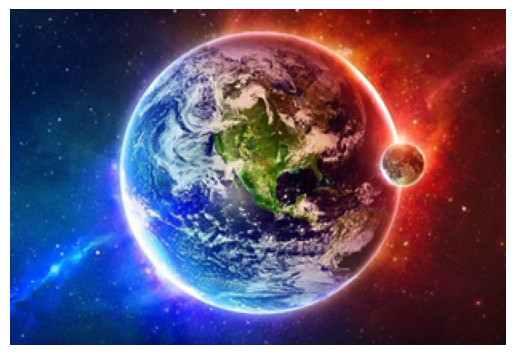

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open("traidat.png")
img = img.convert("RGB")
new_img = img.resize((img.width // 2, img.height // 2), Image.LANCZOS)
plt.imshow(new_img)
plt.axis('off')
plt.show()

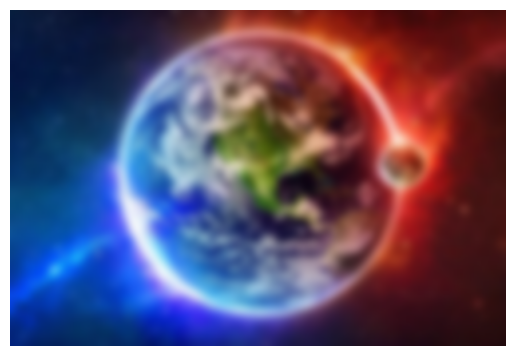

In [ ]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
img = Image.open("traidat.png").convert("RGB")
blur_img = img.filter(ImageFilter.GaussianBlur(radius=5))
plt.imshow(blur_img)
plt.axis('off')
plt.show()
blur_img.save("traidat_blurred.png")

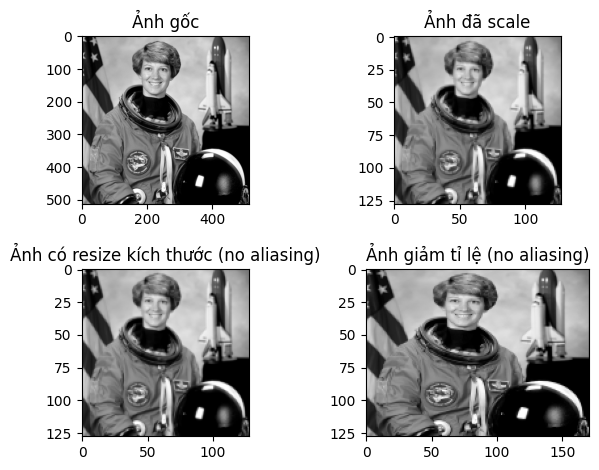

In [ ]:
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
image = color.rgb2gray(data.astronaut())
image_rescaled = rescale(image, 1.0 / 4.0, anti_aliasing=True)
image_resized = resize(image, (image.shape[0] // 4, image.shape[1] // 4), anti_aliasing=True)
image_downscaled = downscale_local_mean(image, (4, 3))
fig, axes = plt.subplots(nrows=2, ncols=2)
ax = axes.ravel()
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Ảnh gốc")
ax[1].imshow(image_rescaled, cmap='gray')
ax[1].set_title("Ảnh đã scale")
ax[2].imshow(image_resized, cmap='gray')
ax[2].set_title("Ảnh có resize kích thước (no aliasing)")
ax[3].imshow(image_downscaled, cmap='gray')
ax[3].set_title("Ảnh giảm tỉ lệ (no aliasing)")
ax[0].set_xlim(0, 512)
ax[0].set_ylim(512, 0)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
A = np.array([[0,0,1.0/2, 1.0/2],
 [1.0/3,0,0,0],
 [1.0/3,0,0,1.0/2],
 [1.0/3,1.0,1.0/2,0]])
x = np.array([1,1,1,1])
x = np.dot(A, x)
print (x)

[1.         0.33333333 0.83333333 1.83333333]


In [ ]:
x = np.array([1.0, 1.0, 1.0, 1.0])
for i in range(10):
 x = np.dot(A, x)
 print (i+1, x)

1 [1.         0.33333333 0.83333333 1.83333333]
2 [1.33333333 0.33333333 1.25       1.08333333]
3 [1.16666667 0.44444444 0.98611111 1.40277778]
4 [1.19444444 0.38888889 1.09027778 1.32638889]
5 [1.20833333 0.39814815 1.06134259 1.33217593]
6 [1.19675926 0.40277778 1.06886574 1.33159722]
7 [1.20023148 0.39891975 1.06471836 1.3361304 ]
8 [1.20042438 0.40007716 1.06814236 1.3313561 ]
9 [1.19974923 0.40014146 1.06581951 1.3342898 ]
10 [1.20005466 0.39991641 1.06706131 1.33296762]


Bài tập chương

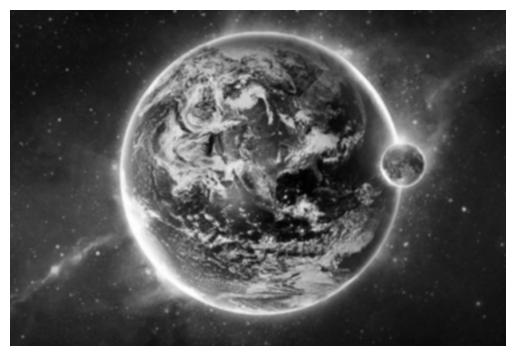

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
img = Image.open("traidat.png").convert("L")
img_array = np.array(img)
gauss_kernel = np.array([
    [1,  4,  6,  4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1,  4,  6,  4, 1]
]) / 256
blur = convolve2d(img_array, gauss_kernel, mode='same', boundary='symm')
plt.imshow(blur, cmap='gray')
plt.axis('off')
plt.show()

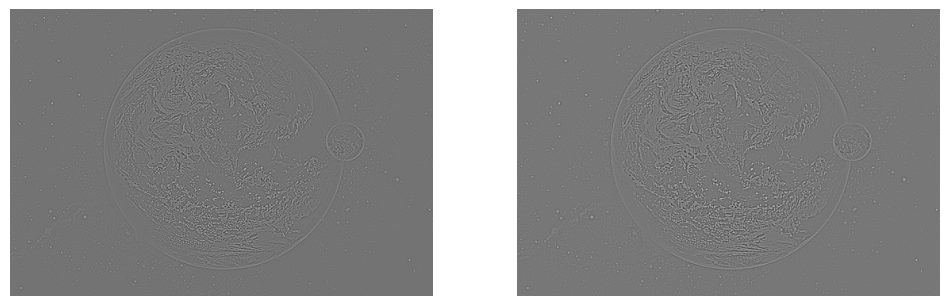

In [ ]:
kernel_a = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
kernel_b = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
edge_a = convolve2d(img_array, kernel_a, mode='same', boundary='symm')
edge_b = convolve2d(img_array, kernel_b, mode='same', boundary='symm')
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(edge_a, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(edge_b, cmap='gray')
plt.axis('off')
plt.show()